In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score,accuracy_score,classification_report,confusion_matrix
from sklearn import model_selection

In [2]:
data = pd.read_csv(r'C:\Users\pnish\OneDrive\Documents\Projects\Customer Subscription\new_data.csv')

In [3]:
data.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,credit_count,cc_count,loan_count
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,0,7,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,5,0,0,2
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,0,6,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,0,9,2,0,1


In [4]:
X = data.drop(columns = ['enrolled'])
y = data['enrolled']

### Train Test Split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [18]:
train_identifier = X_train['user']
X_train = X_train.drop(columns = 'user')
test_identifier = X_test['user']
X_test = X_test.drop(columns = 'user')

### Scaling

In [20]:
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train), index = X_train.index, columns = X_train.columns)
X_test = pd.DataFrame(sc.transform(X_test), index = X_test.index, columns = X_test.columns)

### Spot Checking

In [27]:
def spt_chk(model,X_train,y_train,X_test,y_test):
    model.fit(X_train, y_train)
    cv_score = cross_val_score(model, X_train, y_train, cv= 5, scoring = 'balanced_accuracy').mean()
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    print("Training Balanced Error Rate : ", 1-balanced_accuracy_score(y_train,y_train_pred))
    print("Cross Validation Balanced Error Rate : ",1-cv_score)
    print("Testing dataset results : \n")
    test_ber = 1-balanced_accuracy_score(y_test,y_test_pred)
    print("Testing Balanced Error Rate : ", test_ber)
    print("Classification Report :\n", classification_report(y_test,y_test_pred))
    print("Confusion Matrix :\n")
    plt.subplots()[1].xaxis.tick_top()
    sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d')
    plt.show()
    
    return cv_score,test_ber

In [28]:
models = dict()
models['NB']= GaussianNB()
models['MLP'] = MLPClassifier()
models['SVC'] = SVC()
models['KNN'] = KNeighborsClassifier()
models['DT'] = DecisionTreeClassifier()
models['RF'] = RandomForestClassifier()

The Classifier is :  NB
Training Balanced Error Rate :  0.2863473308833626
Cross Validation Balanced Error Rate :  0.28732149206505353
Testing dataset results : 

Testing Balanced Error Rate :  0.28093189096391513
Classification Report :
               precision    recall  f1-score   support

           0       0.71      0.77      0.74      5105
           1       0.74      0.67      0.70      4895

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000

Confusion Matrix :



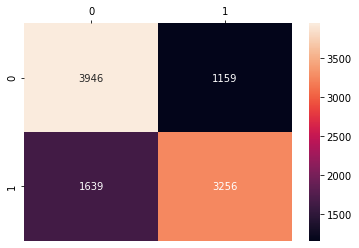

The Classifier is :  MLP


C:\Users\pnish\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\pnish\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\pnish\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\pnish\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  %

Training Balanced Error Rate :  0.1666072559492333
Cross Validation Balanced Error Rate :  0.24521499765092558
Testing dataset results : 

Testing Balanced Error Rate :  0.23577087495585558
Classification Report :
               precision    recall  f1-score   support

           0       0.77      0.76      0.77      5105
           1       0.75      0.77      0.76      4895

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000

Confusion Matrix :



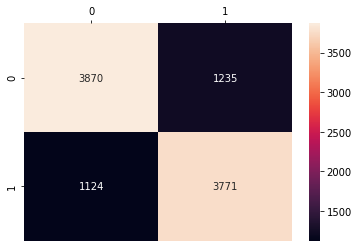

The Classifier is :  SVC
Training Balanced Error Rate :  0.19745061209372372
Cross Validation Balanced Error Rate :  0.22568613003603322
Testing dataset results : 

Testing Balanced Error Rate :  0.21799853735497354
Classification Report :
               precision    recall  f1-score   support

           0       0.78      0.80      0.79      5105
           1       0.79      0.76      0.77      4895

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000

Confusion Matrix :



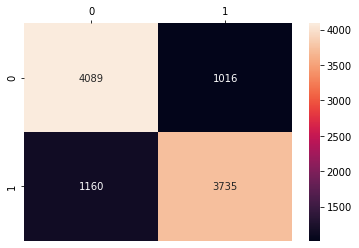

The Classifier is :  KNN
Training Balanced Error Rate :  0.18496733014710887
Cross Validation Balanced Error Rate :  0.2745818150704388
Testing dataset results : 

Testing Balanced Error Rate :  0.2609189652636813
Classification Report :
               precision    recall  f1-score   support

           0       0.75      0.73      0.74      5105
           1       0.73      0.75      0.74      4895

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000

Confusion Matrix :



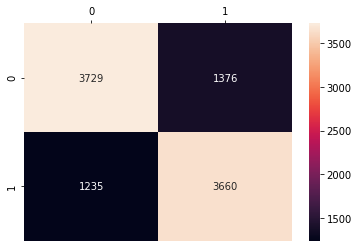

The Classifier is :  DT
Training Balanced Error Rate :  0.00015033826108745707
Cross Validation Balanced Error Rate :  0.30568054125774025
Testing dataset results : 

Testing Balanced Error Rate :  0.30441794831520697
Classification Report :
               precision    recall  f1-score   support

           0       0.71      0.69      0.70      5105
           1       0.69      0.70      0.69      4895

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

Confusion Matrix :



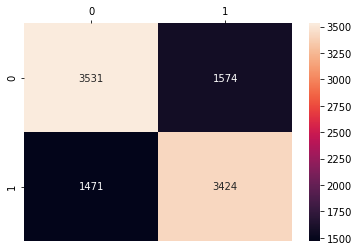

The Classifier is :  RF
Training Balanced Error Rate :  0.0001501132599484034
Cross Validation Balanced Error Rate :  0.21991408206504048
Testing dataset results : 

Testing Balanced Error Rate :  0.21429610458212067
Classification Report :
               precision    recall  f1-score   support

           0       0.79      0.80      0.79      5105
           1       0.79      0.77      0.78      4895

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000

Confusion Matrix :



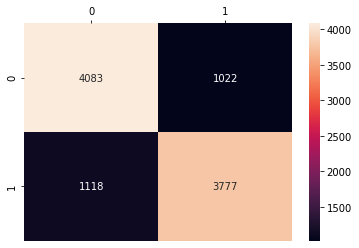

In [29]:
results = []
names = []
for name, model in models.items():
    print('The Classifier is : ',name)
    names.append(name)
    results.append(spt_chk(model,X_train,y_train,X_test,y_test))

In [69]:
cv_bal_acc = [results[i][0] for i in range(len(results))]
cv_bal_acc

[0.7126785079349465,
 0.7547850023490744,
 0.7743138699639668,
 0.7254181849295612,
 0.6943194587422598,
 0.7800859179349595]

In [71]:
test_ber = [results[i][1] for i in range(len(results))]
test_ber

[0.28093189096391513,
 0.23577087495585558,
 0.21799853735497354,
 0.2609189652636813,
 0.30441794831520697,
 0.21429610458212067]

In [74]:
model_cv_results = pd.DataFrame()
model_cv_results['Model'] = names
model_cv_results['CV_Balanced_Accuracy'] = cv_bal_acc
model_cv_results['Test_Balanced_Error_Rate'] = test_ber
model_cv_results

,Model,CV_Balanced_Accuracy,Test_Balanced_Error_Rate
0,NB,0.712679,0.280932
1,MLP,0.754785,0.235771
2,SVC,0.774314,0.217999
3,KNN,0.725418,0.260919
4,DT,0.694319,0.304418
5,RF,0.780086,0.214296
